# PCB DEFECTS DETECTION
Dataset Used: PCB_augmented

Algorithm applied: Isolation Forest

Modules

In [66]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, f1_score
import matplotlib.pyplot as plt

In [58]:
import warnings
warnings.filterwarnings('ignore')

Data preprocessing

In [67]:
# Function to load and preprocess images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))  # Read image in color
        if img is not None:
            # Resize image to a fixed size (e.g., 100x100)
            img = cv2.resize(img, (100, 100))
            images.append((filename, img))  # Store filename along with image
    return images

# Replace 'good_images_folder_path' with the path to the directory containing your "good" images
good_images_folder_path = r'R:\SIEMENS_Intern\PCB_augmented'

# Load and preprocess "good" images from the specified folder
good_images = load_images_from_folder(good_images_folder_path)


Data split into training, validation, and testing sets

In [68]:
# Split the dataset into train_val and test sets (75% train_val, 25% test)
X_train_val, X_test = train_test_split(good_images, test_size=0.25, random_state=42)

# Split the train_val set into train and validation sets (50% train, 25% validation)
X_train, X_val = train_test_split(X_train_val, test_size=0.33, random_state=42)

Conversion of images to array and Flatten and reshape the data

In [69]:
X_train_flat = np.array([image[1].flatten() for image in X_train])
X_val_flat = np.array([image[1].flatten() for image in X_val])
X_test_flat = np.array([image[1].flatten() for image in X_test])

Train the Isolation Forest model

In [70]:
isolation_forest = IsolationForest(random_state=42)
isolation_forest.fit(X_train_flat)

IsolationForest(random_state=42)

Evaluate the model

In [71]:
#Predict on training set
y_train_pred = isolation_forest.predict(X_train_flat)

# Predict on validation set
y_val_pred = isolation_forest.predict(X_val_flat)

# Predict on test set
y_test_pred = isolation_forest.predict(X_test_flat)

Isolation Forest Implementation & Model prediction

In [72]:
# Train the Isolation Forest model on the train set
clf = IsolationForest(random_state=42)
clf.fit(X_train_flat)

# Predict anomalies on the validation set
y_pred_val = clf.predict(X_val_flat)

# Convert predictions to binary labels (0 for normal, 1 for anomaly)
y_pred_val[y_pred_val == 1] = 0  # Normal
y_pred_val[y_pred_val == -1] = 1  # Anomaly

Model Evaluation

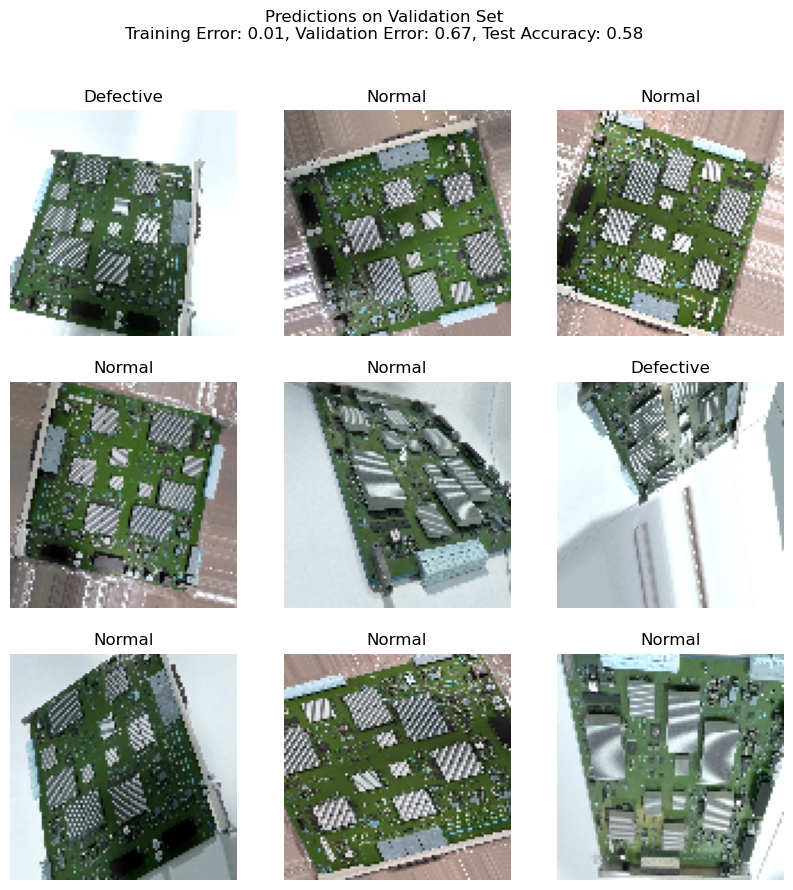

In [65]:
# Calculate accuracy based on the proportion of anomalies predicted
val_accuracy = np.mean(y_pred_val == 1)

# Calculate average anomaly score for training samples
train_anomaly_scores = clf.decision_function(X_train_flat)

# Training error is the average anomaly score
train_error = np.mean(train_anomaly_scores)

# Predict anomalies on the test set
test_anomaly_scores = clf.decision_function(X_test_flat)

# Test error is the average anomaly score
test_error = np.mean(test_anomaly_scores)

# Calculate validation error
val_error = 1 - val_accuracy

# Calculate accuracy on test data
y_pred_test = clf.predict(X_test_flat)
test_accuracy = np.mean(y_pred_test == 1)

# Output predictions along with images in a 3x3 grid
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle(f'Predictions on Validation Set\nTraining Error: {train_error:.2f}, Validation Error: {val_error:.2f}, Test Accuracy: {test_accuracy:.2f}')
for i in range(3):
    for j in range(3):
        index = i * 3 + j
        if index < len(X_val):
            filename, image = X_val[index]
            pred = y_pred_val[index]
            axs[i, j].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            if pred == 1:
                axs[i, j].set_title('Defective')
            else:
                axs[i, j].set_title('Normal')
            axs[i, j].axis('off')
        else:
            axs[i, j].axis('off')

plt.show()


NOTE: Confusion Matrix cannot be calculated for Isolation forest algorithm as it is an unsupervised algorithm and doesn't require true labels for training, there exists no true labels for the entire dataset.